### Install liblarires

In [1]:
import pandas
import numpy as np
import seaborn as sns
import math
from datetime import datetime


### Load data

In [2]:
def harmonic_mean_speed(group) :
    df = group.apply(lambda x : x)
    value = df.Volume * df.Speed
    
    try :
        return sum(value) / sum(df.Volume)
    
    except ZeroDivisionError :
        return 0
    
    
def combine_lanes(group) :
    return pandas.Series([group.Volume.mean(), group.Occupancy.mean(), harmonic_mean_speed(group)], index=['Volume', 'Occupancy', 'Speed'])


dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y %H:%M')

laned_data = pandas.read_csv('5270app.csv', parse_dates=['Time_AEST'], date_parser=dateparse)
laned_data['Speed'] = laned_data['Speed'].replace(np.nan, 0)


combined_lanes = laned_data.groupby('Time_AEST').apply(combine_lanes)

combined_lanes

,Volume,Occupancy,Speed
Time_AEST,,,
2021-05-01 00:00:00,3.00,1.250,93.833333
2021-05-01 00:01:00,4.50,1.850,94.333333
2021-05-01 00:02:00,4.75,2.425,95.684211
2021-05-01 00:03:00,3.50,1.750,97.785714
2021-05-01 00:04:00,1.50,0.750,98.833333
...,...,...,...
2021-06-30 23:55:00,2.25,1.150,97.444444
2021-06-30 23:56:00,1.50,0.550,95.500000
2021-06-30 23:57:00,1.50,0.725,100.500000


### Task A: What is the statistical correlation between Volume, Occupancy and Speed?

In [3]:
print('The statistical correlation between Volumne, Occupancy and Speed')
combined_lanes.corr()

The statistical correlation between Volumne, Occupancy and Speed


,Volume,Occupancy,Speed
Volume,1.000000,0.745439,-0.374639
Occupancy,0.745439,1.000000,-0.821532
Speed,-0.374639,-0.821532,1.000000


Now we can quickly see a few correlations;

    1) A strong positive correlation between Volume and Occupancy. As well as a slight negative correlation 
    between Volume and Speed.
    2) A strong negative correlation between Occupancy and Speed.
    

### Task B: Compute "normal" values for each hour of each day of the week

We have seen in assignment 2 that the traffic load tends to vary based on the time of the day and the day of the week. 

We are now interesting in identifying traffic anomalies, i.e. where there is a change relative to this typical traffic pattern. 

Such anomalies are typically due to events such as roadworks or traffic accidents. 

For our analysis we will focus on 1 hour time periods (for example between 8am and 9am or between 5pm and 6pm). 

Before we can identify atypical traffic on a particular day, we need to determine what is "normal" for each hour of each day of the week.

In [4]:
# INSERT YOUR CODE HERE to compute the average Speed, Volume and Occupancy for each hour of each day of the week
# Note: whenever we say "average", that should be interpretted as harmonic mean for the Speed variable. 
# The average Volume and Occupancy is the simple arithmetic mean.

normal = combined_lanes.groupby([combined_lanes.index.weekday, combined_lanes.index.hour]).mean()

normal.index.names = ["Day", "Hour"]
normal

Volume  Occupancy      Speed
Day Hour                                
0   0     1.382407   0.590278  96.781260
    1     0.931944   0.413287  94.381565
    2     0.912963   0.431667  95.567730
    3     1.260648   0.611250  97.540533
    4     3.001389   1.634861  98.984235
...            ...        ...        ...
6   19    7.920370   3.403241  97.476293
    20    6.728704   2.727176  97.101272
    21    5.268056   2.142361  97.185205
    22    4.159722   1.691898  97.212343
    23    2.421296   0.995000  97.236838

[168 rows x 3 columns]

### Task C: Display the normal values of each variable in a tabular format (by hour of day and day of week)

Regardless of how your normal dataframe is structured, we now wish to present that normal data to our manager in a nice tabular fashion for each variable where there is one row for each hour of the day and a column for each day of the week.

Your normal dataframe will likely store the day of the week as a number, but for the purposes of displaying the data to our manager we will instead substitute day names as our column labels.

Hint: don't construct a new dataframe element by element, instead take your existing normal data frame and filter, reshape or stack/unstack to create the desired tabular output.

Round all displayed values to 1 decimal place (but don't alter the underlying normal data).

Note: these new tables are only generated for display purposes, not for later use in anomoly computation (which should use your normal dataframe directly)



In [5]:
# The parameter column will be either 'Volume', 'Speed' or 'Occupancy' 
# (which should be column names in your normal data frame)

def normal_by_day_hour(column) :
    return normal[column].round(decimals = 1).unstack(level = 0).rename(columns = dict((i, j) for i,j in enumerate('Monday Tuesday Wednesday Thursday Friday Saturday Sunday'.split(' '))))



In [6]:
normal_by_day_hour('Volume')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,1.4,1.5,1.6,1.8,2.0,2.7,2.7
1,0.9,1.0,1.1,1.2,1.3,1.6,1.7
2,0.9,1.1,1.1,1.2,1.2,1.3,1.2
3,1.3,1.4,1.4,1.4,1.6,1.3,1.2
4,3.0,3.2,3.1,3.3,3.4,2.1,1.6
5,10.0,10.8,10.6,10.7,10.5,4.8,2.8
6,16.2,17.4,16.7,17.6,16.7,7.5,4.9
7,18.7,20.2,19.5,20.5,20.1,11.1,7.4
8,17.6,18.7,18.1,19.3,19.1,15.7,11.8


In [7]:
normal_by_day_hour('Occupancy')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,0.6,0.7,0.7,0.8,0.9,1.1,1.2
1,0.4,0.5,0.6,0.6,0.6,0.7,0.7
2,0.4,0.5,0.5,0.6,0.6,0.6,0.7
3,0.6,0.7,0.7,0.7,0.8,0.6,0.5
4,1.6,1.5,1.4,1.5,1.6,0.9,0.7
5,4.5,4.9,4.7,4.8,4.7,2.1,1.4
6,7.3,7.8,7.6,7.9,7.5,3.2,2.0
7,8.4,9.3,8.9,9.4,9.1,4.6,3.0
8,8.2,8.5,8.4,8.8,8.7,6.5,4.8


In [8]:
normal_by_day_hour('Speed')

Day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour,,,,,,,
0,96.8,97.6,97.7,98.4,98.5,97.8,97.3
1,94.4,93.6,96.1,97.4,97.4,97.5,97.1
2,95.6,93.5,97.2,97.7,98.4,97.1,96.4
3,97.5,95.3,98.0,98.9,98.8,98.1,96.4
4,99.0,98.6,99.0,99.2,99.2,98.5,97.4
5,98.8,98.9,99.1,99.1,99.3,98.6,97.5
6,97.1,96.9,97.1,97.1,97.4,98.6,98.4
7,95.7,95.3,94.9,95.5,95.6,98.2,98.5
8,95.6,95.5,94.9,95.5,95.5,97.5,98.2


### Task D: Join the data for each hour of the sample period with the corresponding normal data for that hour of day and day of week

Next we will compute the average Speed, Volume and Occupancy for each hour in the sample period (which for our data file is 01-05-2021 to 30-06-2021)

We then join that data with the normal data for the corresponding hour of day and day of week.

We are then able to compute for each hour in the sample period the difference between the average and the normal average for each of our variables (Speed, Volume and Occupancy).

We will express these differences as percentage differences relative to the normal value.

For example, if the average speed is 95.908, but the normal average speed is 97.641 then the Speed Difference as a percentage will be -1.77%


In [9]:
diff = combined_lanes.copy()

diff['Date'] = diff.index.normalize()
diff['Day'] = diff.index.weekday
diff['Hour'] = diff.index.hour
diff = diff.groupby(['Date', 'Day', 'Hour']).mean()
diff = diff.reset_index()

diff = pandas.merge(diff, normal,  on = ['Day', 'Hour'])

diff.rename(columns = {'Volume_x' : 'Volume', 'Occupancy_x' : 'Occupancy', 'Speed_x' : 'Speed', 'Volume_y' : 'Volume_Normal', 'Occupancy_y' : 'Occupancy_Normal', 'Speed_y' : 'Speed_Normal'}, inplace = True)



diff['Speed_Difference'] = 100 * (1 - diff.Speed_Normal / diff.Speed)
diff['Volume_Difference'] = 100 * (1 - diff.Volume_Normal / diff.Volume)
diff['Occupancy_Difference'] = 100 * (1 - diff.Occupancy_Normal / diff.Occupancy)

diff

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
0,2021-05-01,5,0,2.620833,1.112500,95.914301,2.658796,1.096759,97.782383,-1.947658,-1.448507,1.414898
1,2021-05-08,5,0,2.541667,1.050833,97.808381,2.658796,1.096759,97.782383,0.026580,-4.608379,-4.370429
2,2021-05-15,5,0,2.758333,1.117083,97.802797,2.658796,1.096759,97.782383,0.020872,3.608593,1.819387
3,2021-05-22,5,0,3.237500,1.312083,97.706154,2.658796,1.096759,97.782383,-0.078019,17.875018,16.410854
4,2021-05-29,5,0,2.679167,1.118750,98.035642,2.658796,1.096759,97.782383,0.258333,0.760325,1.965653
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2021-05-28,4,23,4.529167,1.871667,98.147388,5.085938,2.352917,97.786505,0.367695,-12.293008,-25.712378
1460,2021-06-04,4,23,4.954167,2.049167,97.642285,5.085938,2.352917,97.786505,-0.147703,-2.659798,-14.823099
1461,2021-06-11,4,23,4.445833,1.826667,97.774704,5.085938,2.352917,97.786505,-0.012070,-14.397844,-28.809307
1462,2021-06-18,4,23,4.675000,1.905833,97.633047,5.085938,2.352917,97.786505,-0.157179,-8.790107,-23.458679


### Task E: For each variable, identify which hours of the sample period had the largest variation compared to normal values


To identify traffic incidents such as crashes, we now identify the outliers where the difference between the actual and normal values of our variables is greatest.

We don't know which of our variables (Speed, Volume or Occupancy) will give us the best indication of a traffic incident such as a crash, so we will examine outliers for each variable in turn.

It also may not be immediately obvious whether we are looking for large increases or large decreases in each of our variables in order to identify a traffic incident.

With respect to speed, we would expect a crash to result in a decrease in average Speed, but what about Volume and Occupancy? Would we expect them to be higher or lower than normal during a traffic jam?

In [10]:
# Create a function that will identify the outliers in our difference data
# The parameter column will be either 'Volume', 'Speed' or 'Occupancy'
# (which should be column names in your normal data frame)
# The parameter ascending will be True if we wish to find the largest
# decreases or False if we wish to find the largest increases
# The paremater count tells us how many outlier rows to return. For
# example, a value of 5 would mean return the 5 rows with the largest differences

def find_worse(column, ascending, count) :
    
    return diff.sort_values(column + '_Difference', ascending = ascending)[: count]



In [11]:
worst_speed = find_worse('Speed', True, 5) # find the 5 rows with the worst speed differences

worst_speed

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
111,2021-05-22,5,12,14.891667,37.021250,21.261635,20.606019,15.443009,74.529391,-250.534619,-38.372816,58.286094
784,2021-05-11,1,15,15.679167,38.884167,27.682841,21.697222,20.267269,63.699296,-130.103901,-38.382496,47.877838
109,2021-05-08,5,12,21.087500,24.495000,39.707191,20.606019,15.443009,74.529391,-87.697465,2.283255,36.954443
100,2021-05-08,5,11,20.575000,25.543333,38.127120,21.786111,15.597454,71.379354,-87.214123,-5.886324,38.937282
1374,2021-06-18,4,12,19.545833,22.274167,48.368070,21.676778,11.755126,88.621637,-83.223431,-10.902298,47.225296


In [12]:
# Fixme: should ascending be True or False when trying to using Volume to identify traffic incidents?
worst_volume = find_worse('Volume', True, 4) # find the 4 rows with the worst volume difference

worst_volume

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
477,2021-05-03,0,5,2.858333,1.252500,96.701126,10.000926,4.471296,98.836692,-2.208420,-249.886621,-256.989724
486,2021-05-03,0,6,4.666667,2.009583,97.637988,16.184722,7.320833,97.084698,0.566675,-246.815476,-264.296081
495,2021-05-03,0,7,6.195833,2.624583,97.546080,18.703704,8.359815,95.656620,1.936992,-201.875514,-218.519694
1052,2021-06-30,2,20,2.970833,1.337500,97.968913,7.113426,3.036991,97.605902,0.370537,-139.442107,-127.064728


In [13]:
# Fixme: should ascending be True or False when trying to using Occupancy to identify traffic incidents?
worst_occupancy = find_worse('Occupancy', False, 3) # find the 3 rows with the worst occupancy difference

worst_occupancy

,Date,Day,Hour,Volume,Occupancy,Speed,Volume_Normal,Occupancy_Normal,Speed_Normal,Speed_Difference,Volume_Difference,Occupancy_Difference
242,2021-06-27,6,2,1.225000,2.582917,95.639451,1.212037,0.736713,96.364885,-0.758509,1.058201,71.477478
1029,2021-05-26,2,18,15.316667,22.497917,54.524113,15.392593,8.912130,88.747620,-62.767655,-0.495708,60.386867
111,2021-05-22,5,12,14.891667,37.021250,21.261635,20.606019,15.443009,74.529391,-250.534619,-38.372816,58.286094


### Task F: Preparing data to visualize the hours that appear most atypical


Having identified the hours of the sample period where we suspect there may have been
a traffic incident, we now wish to examine precisely what happened during those hours
in more detail.

For each of our variables (Speed, Occupancy and Volumne) we ultimately wish to create
a plot showing the actual data during that hour compared to the normal averages for
each minute of that hour.

Before we can plot, we need to extract and compute the relevant data for the hour when
our potential incident occurred.

This time, when computing the normal average for each minute, we will exclude the
date of the potential incident (otherwise data from during the incident may skew the
averages).

We will create two functions, one to extract and compute the normal averages for each
minute of the particular hour of day and day of week (excluding the specified date) and
the other to compute the data for each minute of the particular hour on the specified
date.


In [14]:
# Add extra "helper" functions here if you wish (to avoid repeating yourself)
def helper_function():
    df = combined_lanes.copy()

    df['Date'] = df.index.normalize()
    df['Day'] = df.index.weekday
    df['Hour'] = df.index.hour
    df['Minute'] = df.index.minute
    df = df.groupby(['Date', 'Day', 'Hour', 'Minute']).mean()
    df = df.reset_index()
    return df



def get_normal_by_minute(hour_of_day, day_of_week, date) :
    df = helper_function()
    return df.loc[(df.Date != date) & (df.Hour == hour_of_day) & (df.Day == day_of_week), ['Minute', 'Volume', 'Occupancy', 'Speed']].groupby('Minute').mean()


In [15]:
def get_atypical_by_minute(hour_of_day, day_of_week, date) :
    df = helper_function()
    return df.loc[(df.Date == date) & (df.Hour == hour_of_day) & (df.Day == day_of_week), ['Minute', 'Volume', 'Occupancy', 'Speed']].groupby('Minute').mean()
    
    

In [16]:
get_normal_by_minute(17, 6, '2021-06-20')


,Volume,Occupancy,Speed
Minute,,,
0,13.906250,5.775000,96.584320
1,13.281250,5.334375,97.880676
2,15.218750,6.256250,95.577154
3,13.906250,5.696875,96.852167
4,15.062500,6.240625,95.304259
5,14.000000,5.768750,96.802396
6,15.000000,6.153125,96.427946
7,14.000000,5.781250,96.273947
8,15.031250,6.090625,96.625361


In [17]:
get_atypical_by_minute(17, 6, '2021-06-20')


,Volume,Occupancy,Speed
Minute,,,
0,15.50,6.600,94.387097
1,17.75,7.025,95.704225
2,20.50,8.525,95.878049
3,15.00,6.050,97.816667
4,17.00,6.900,94.352941
5,17.25,7.050,94.913043
6,17.50,7.550,94.071429
7,18.25,7.825,95.328767
8,14.25,6.025,96.175439


### Task G: Visualize the hours that appear most atypical

We can now use this data to plot the actual and the normal values for each of our
variables, for each minute of the hour.

We will create 3 subplots, one for each variable (Speed, Occupancy and Volumne)
(see https://stackoverflow.com/questions/22483588/how-to-plot-multiple-
dataframes-in-subplots)

The title of the figure (above the 3 subplots) should be as below and show the day of
week, date and hour of day (see https://stackoverflow.com/questions/7066121/how-
to-set-a-single-main-title-above-all-the-subplots-with-pyplot).

Remember, don't repeat yourself!

In [18]:
import matplotlib.pyplot as plt
import datetime

def plot_hour_comparision(hour_of_day, day_of_week, date) :
    variables = ['Speed', 'Occupancy', 'Volume']
    fig, axes = plt.subplots(ncols = len(variables), figsize = (20, 8))

    # find day name with given date
    year, month, day = (int(x) for x in date.split('-'))    
    day_name = datetime.date(year, month, day).strftime("%A")
    
    # put main title for all graphs
    fig.suptitle(day_name + ' ' + date + ' at hour ' + str(hour_of_day), fontsize = 16)
    
    for i, column in enumerate(variables):
        axes[i].plot(get_atypical_by_minute(hour_of_day, day_of_week, date)[column], label = 'incident')
        axes[i].plot(get_normal_by_minute(hour_of_day, day_of_week, date)[column],   label = 'normal')
        
        axes[i].set_ylabel(column)
        axes[i].set_xlabel('Minute')
        axes[i].set_title(column)
        axes[i].legend()
        
    plt.show()
    



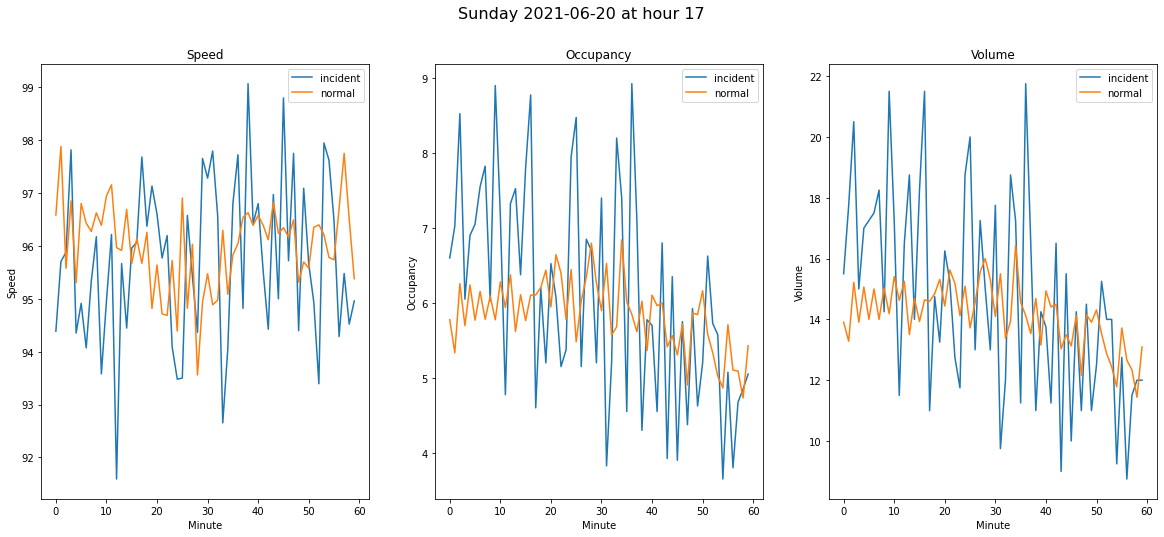

In [19]:
plot_hour_comparision(17, 6, '2021-06-20')

### Task H: Now that we can visualize a specific hour, we can do so for each of the rows in our outlier lists

Normally we shouldn't use for loops to iterate over the rows in a Pandas data frame (we
should use higher level Pandas operations instead).

However, this is one of the few circumstances where it is reasonable
(see https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-
dataframe-in-pandas)

In [20]:
# The parameter worst will be data frame (such as worst_speed, worst_volume
# or worse_occupancy) containing columns: Hour, Day and Date
# We don't know how many rows of data there will be, but we want to create
# plots for each of the hours included in the list

def visualize_worst(worst) :
    for index, row in worst.iterrows():
        plot_hour_comparision(row[2], row[1], str(row[0]).split(' ')[0],)


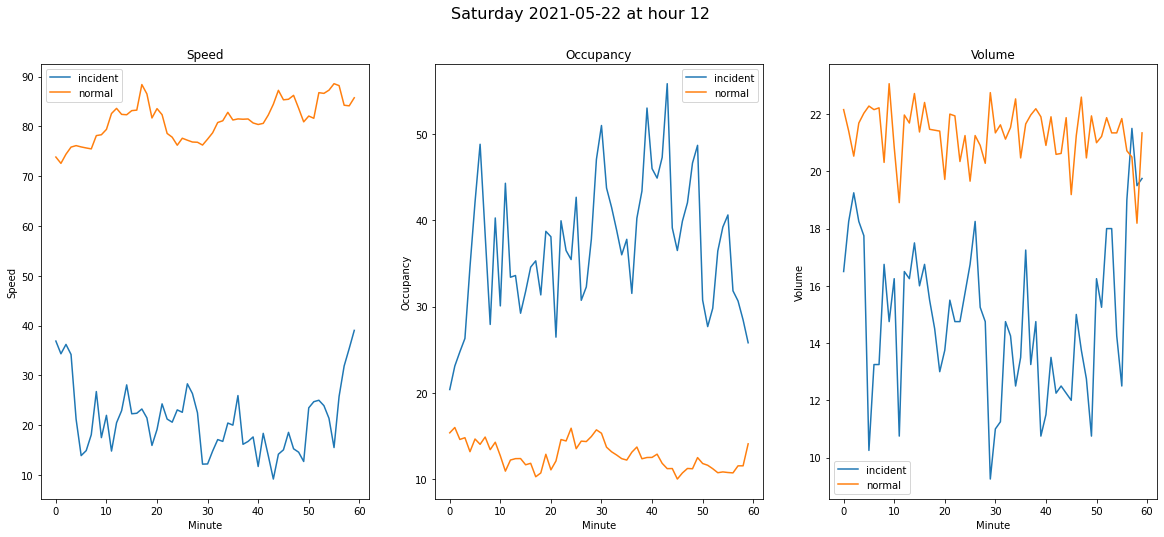

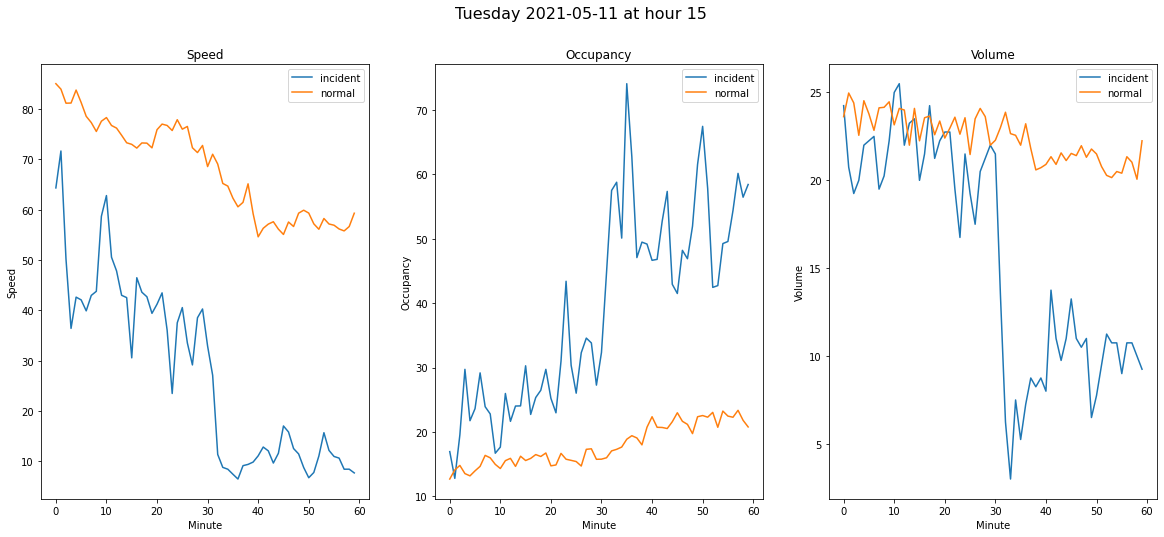

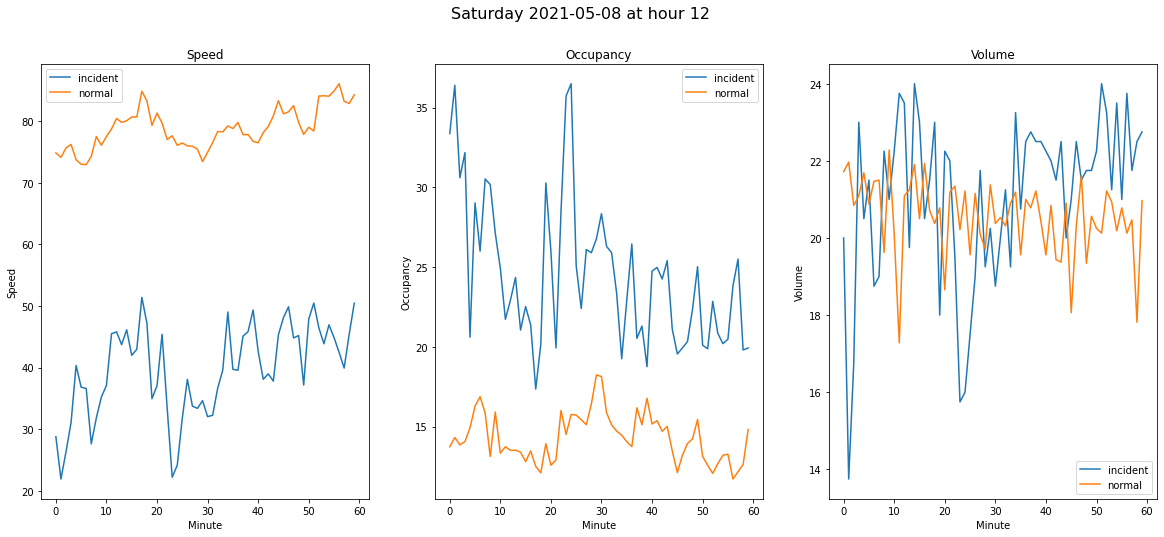

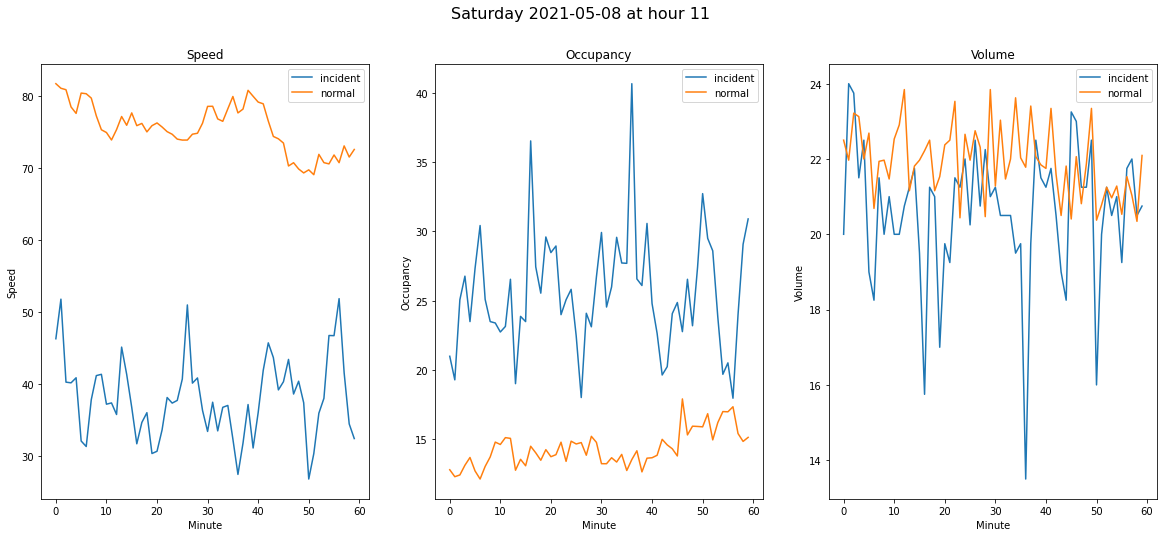

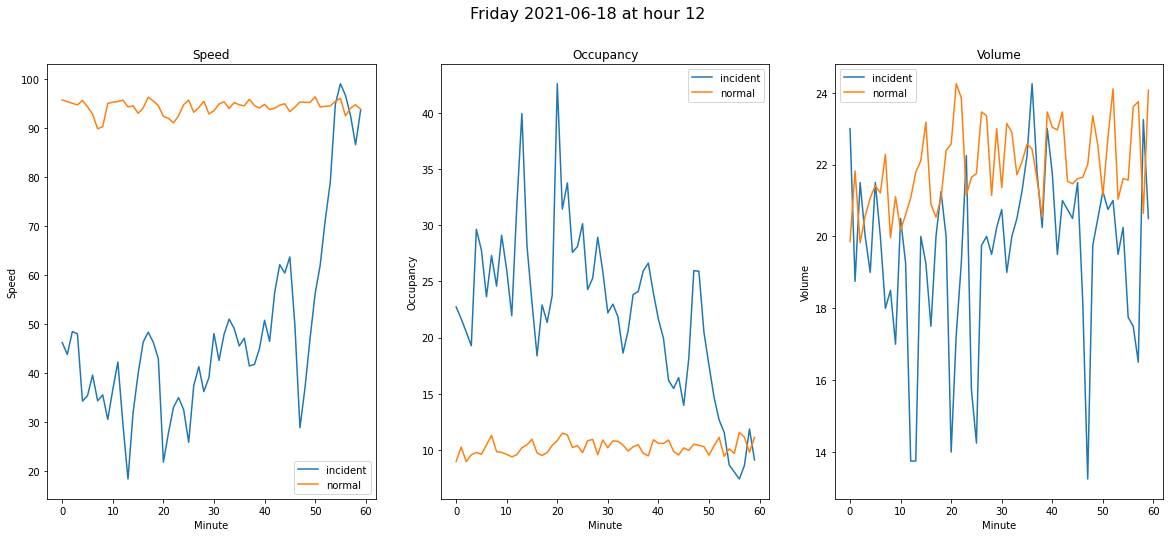

In [21]:
visualize_worst(worst_speed)

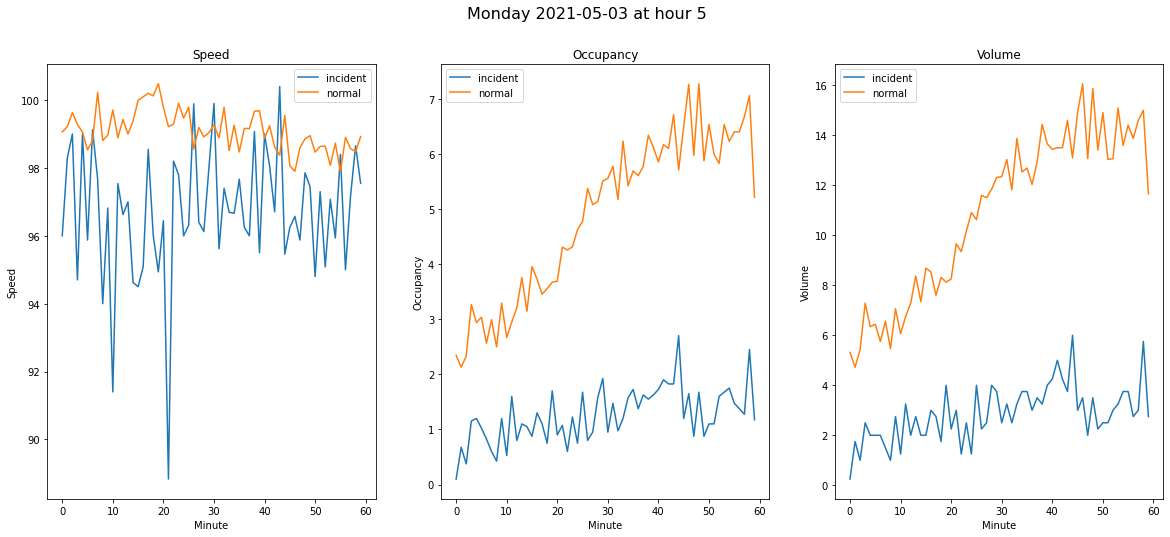

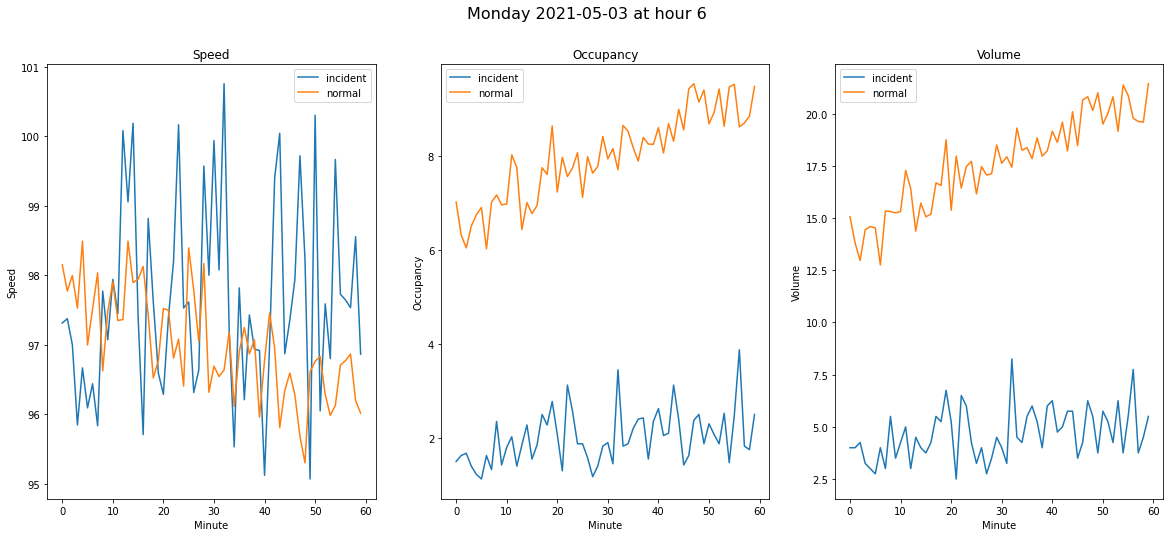

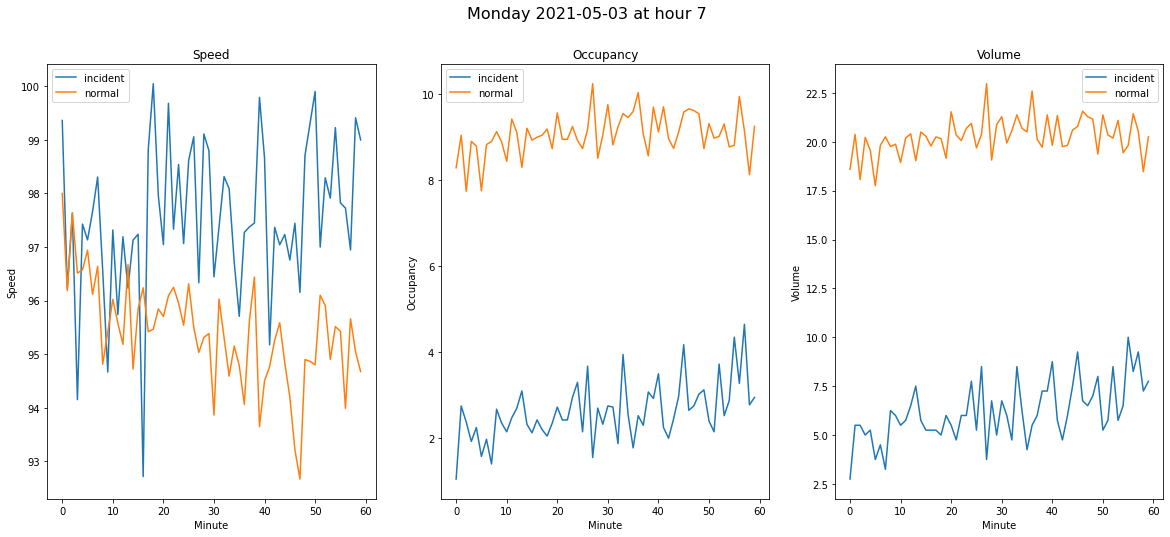

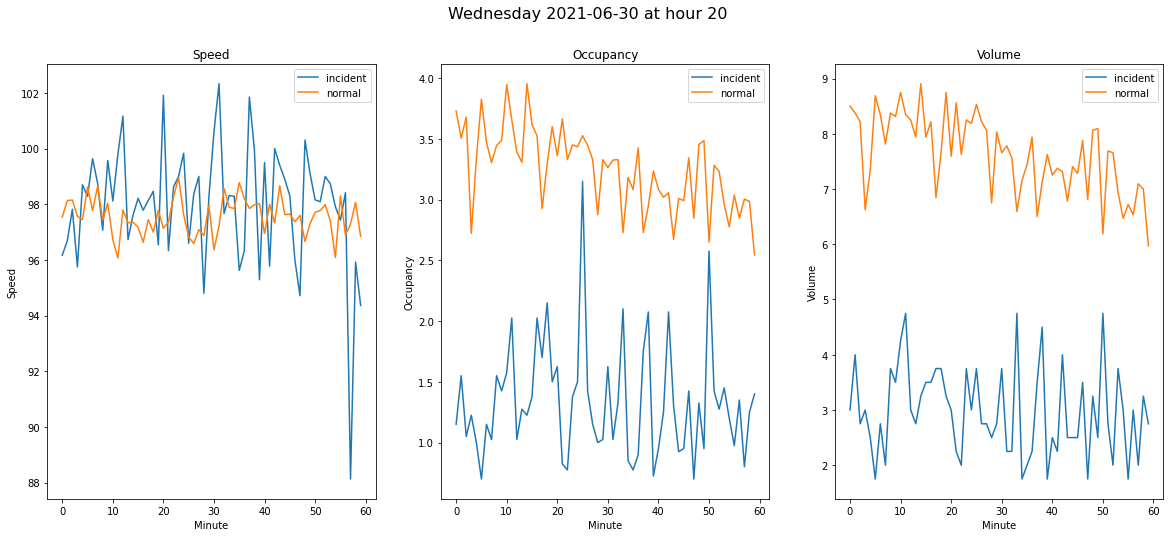

In [22]:
visualize_worst(worst_volume)

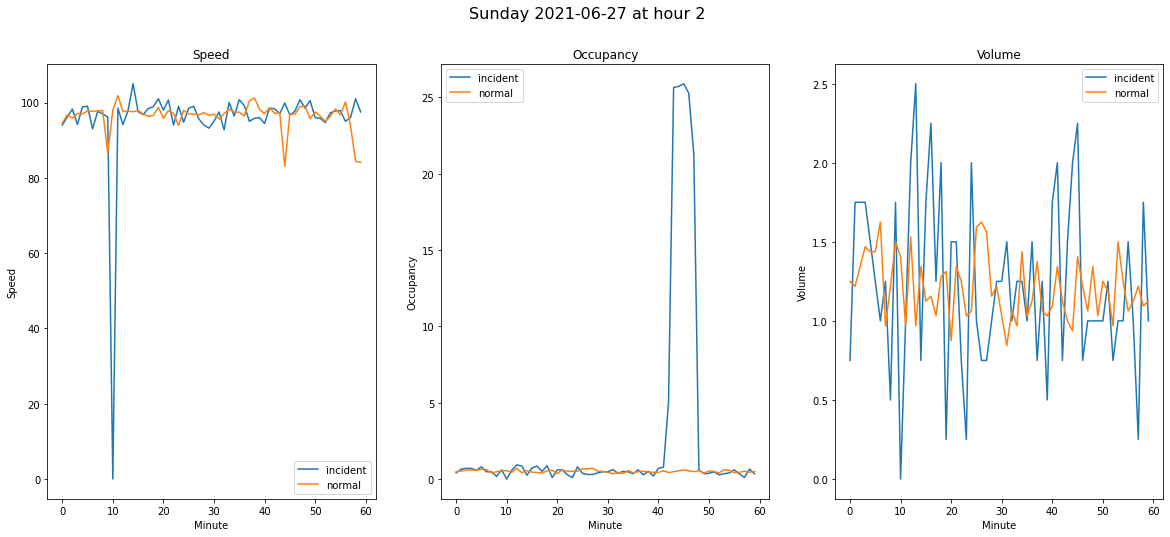

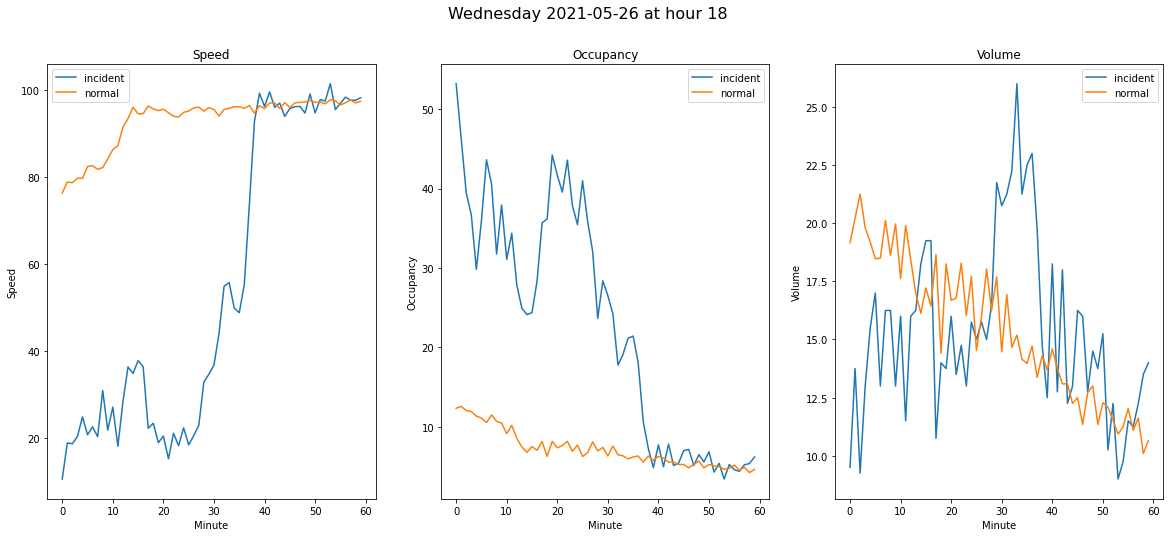

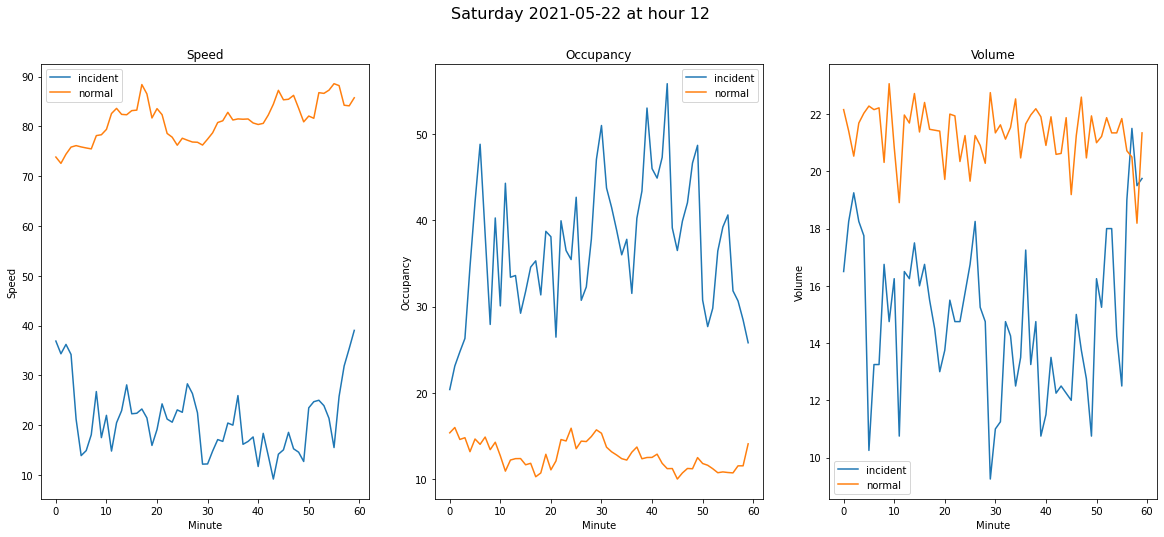

In [23]:
visualize_worst(worst_occupancy)

### Which of our variables (Speed, Volume or Occupancy) seem to provide the most reliable indication of an actual traffic incident?

According to worst_speed data, Occupancy and Speed variables seem to provide the most reliable indication of an  actual traffic incident, while Occupancy and Volume variables provide reliable indication of an actual traffic incident in worst_volume. And Speed and Occupancy variables in worst_occupancy dataset. 